# <span style="color:maroon"> <span style="font-family:Times New Roman"> **IRIS DATA PREDICTION USING DECISION TREE ALGORITHM** </span>


## <span style="color:maroon"> <span style="font-family:Times New Roman"> Author: Smita Shirkar </span>



## <span style="color:maroon"> <span style="font-family:Times New Roman"> TASK: IRIS DATA PREDICTION USING DECISION TREE MACHINE LEARNING ALGORITHM </span>

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Introduction </span>


#### This data set gives us the information about Iris flower. There are 2 different species of Iris flower family, those are Iris-setosa, Iris-versicolor and Iris-virginica. Depending upon the different size of the Iris flower the specie is determined. The dataset consist of 6 varaibles of 150 observation. There is only one desciptive feature in this data set which is the target variable. 

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Aim </span>

#### The aim of this project is to predict the Iris species i.e. Iris-setosa, Iris-versicolor or Iris-virginica depending upon the features given.

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Data Preparation </span>

#### Loading the data and necessary packages

In [1]:
#Importing modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)


#### Reading the data & checking the columns.

In [2]:
#Reading the data and saving it in df variable.
iris_df = load_iris()
df = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
df['target']=iris_df.target

print(df.shape)

df.columns.values #checking columns.

(150, 5)


array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'], dtype=object)

In [3]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### Checking data types of attributes.

In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

#### Checking missing values

In [5]:
print(f"\nNumber of missing values for each feature:")
df.isnull().sum()


Number of missing values for each feature:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### There are no missing values present. and the data is cleaned and ready for further analysis. 

#### CHECKING SUMMARY STASTIC FOR NUMERIC VARIABLES 

In [6]:
#CHECKING SUMMARY STASTIC FOR NUMERIC VARIABLES 
df.describe(include=np.number).round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


## <span style="color:maroon"> <span style="font-family:Times New Roman"> Data Exploration </span>

#### 1.Realtion between sepal length and sepal width is checked.
#### 2.Realtion between petal length and petal width is checked.

In [7]:
data = pd.read_csv('Iris.csv')

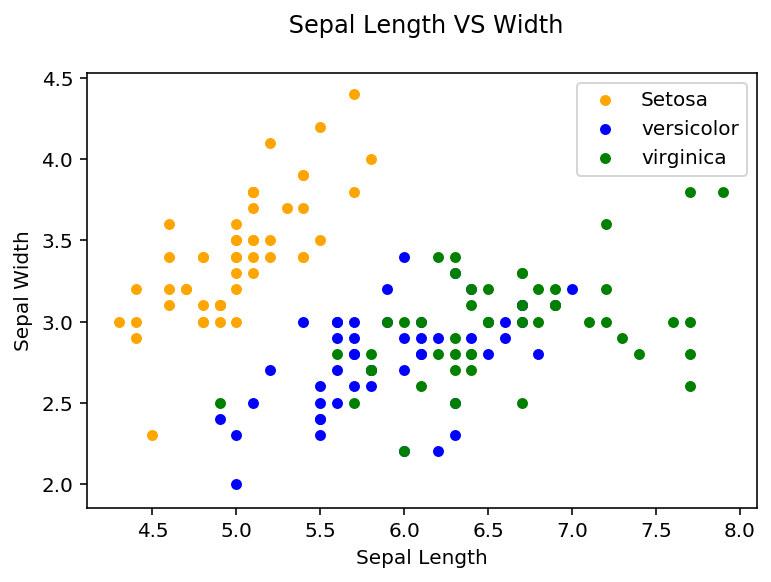

In [8]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title(" Sepal Length VS Width\n")
plt.show()

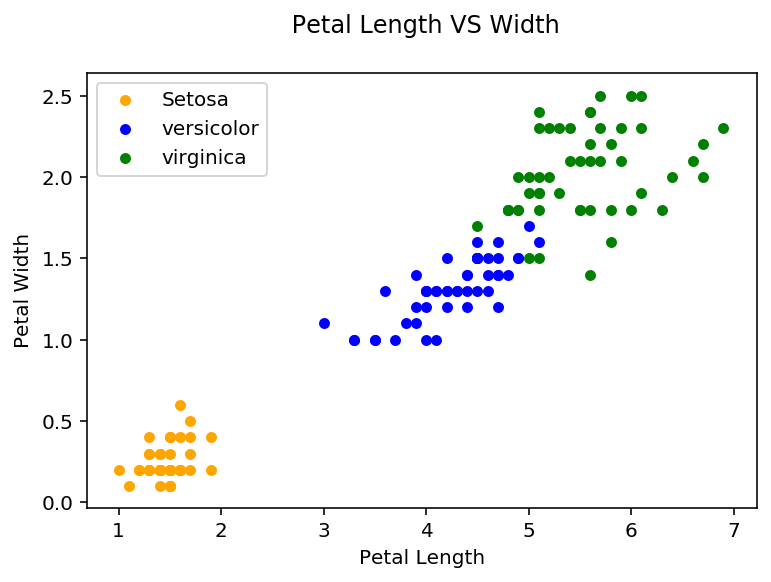

In [9]:
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width\n")
plt.show()

#### According to both the outputs, sepal features are randomly distributed whereas, petal feautres are linearly distributed according to their species and hence we can say that petal features can helps us for prediction. 

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Model Preparation </span>

#### As all are variables are integers we did not do any interger or one-hot-encoding. Therefore before going for modeling and predictions, we will first check colinearity between the variables. 
#### Checking colinearity will help us to eliminate the variables which are highly co-realted and will allow to choose only those variables which will help us in accurate predictions. 

In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


#### As we can see that the values of all the variables are nearby by zero therefore we will choose to keep all the variables in this data for predictions. There is low colinearity observed between variables. 

#### Splitting The Data Into Training And Test Dataset

#### Now we will split the data into data training set and test set in a ratio 70:30 respectively. This splitting will not only help us to build a classifier but also will help us to evlauate the performance of the test set.

#### Following functions are loaded from the sklearn.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[iris_df.feature_names],df['target'], test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


## <span style="color:maroon"> <span style="font-family:Times New Roman"> Decision Tree Model Fitting </span>

#### Decision tree classifier with a maximum depth of 4 using information gain for split criterion (criterion = 'entropy')

In [12]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4)
Decision_tree_fit = DT.fit(X_train, y_train)
Predictions=DT.predict(X_test)
Decision_tree_accuracy = DT.score(X_test, y_test)


In [13]:
print(Decision_tree_fit)
print('Accuracy of Decision tree classifier is : ',Decision_tree_accuracy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy of Decision tree classifier is :  0.9777777777777777


#### For maximum depth 4 the decision Tree Classifier yeilds 97.77 % accuracy and is great model for prediction.
#### As the accuracy is more than 85%, Hyperparameter tunning is not needed. 

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Decision Tree Graph Visualization </span>

[Text(930.0, 2718.0, 'petal width (cm) <= 0.75\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(697.5, 2114.0, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(1162.5, 2114.0, 'petal length (cm) <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(465.0, 1510.0, 'petal width (cm) <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(232.5, 906.0, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(697.5, 906.0, 'sepal width (cm) <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(465.0, 302.0, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(930.0, 302.0, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(1860.0, 1510.0, 'petal length (cm) <= 5.05\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(1627.5, 906.0, 'sepal length (

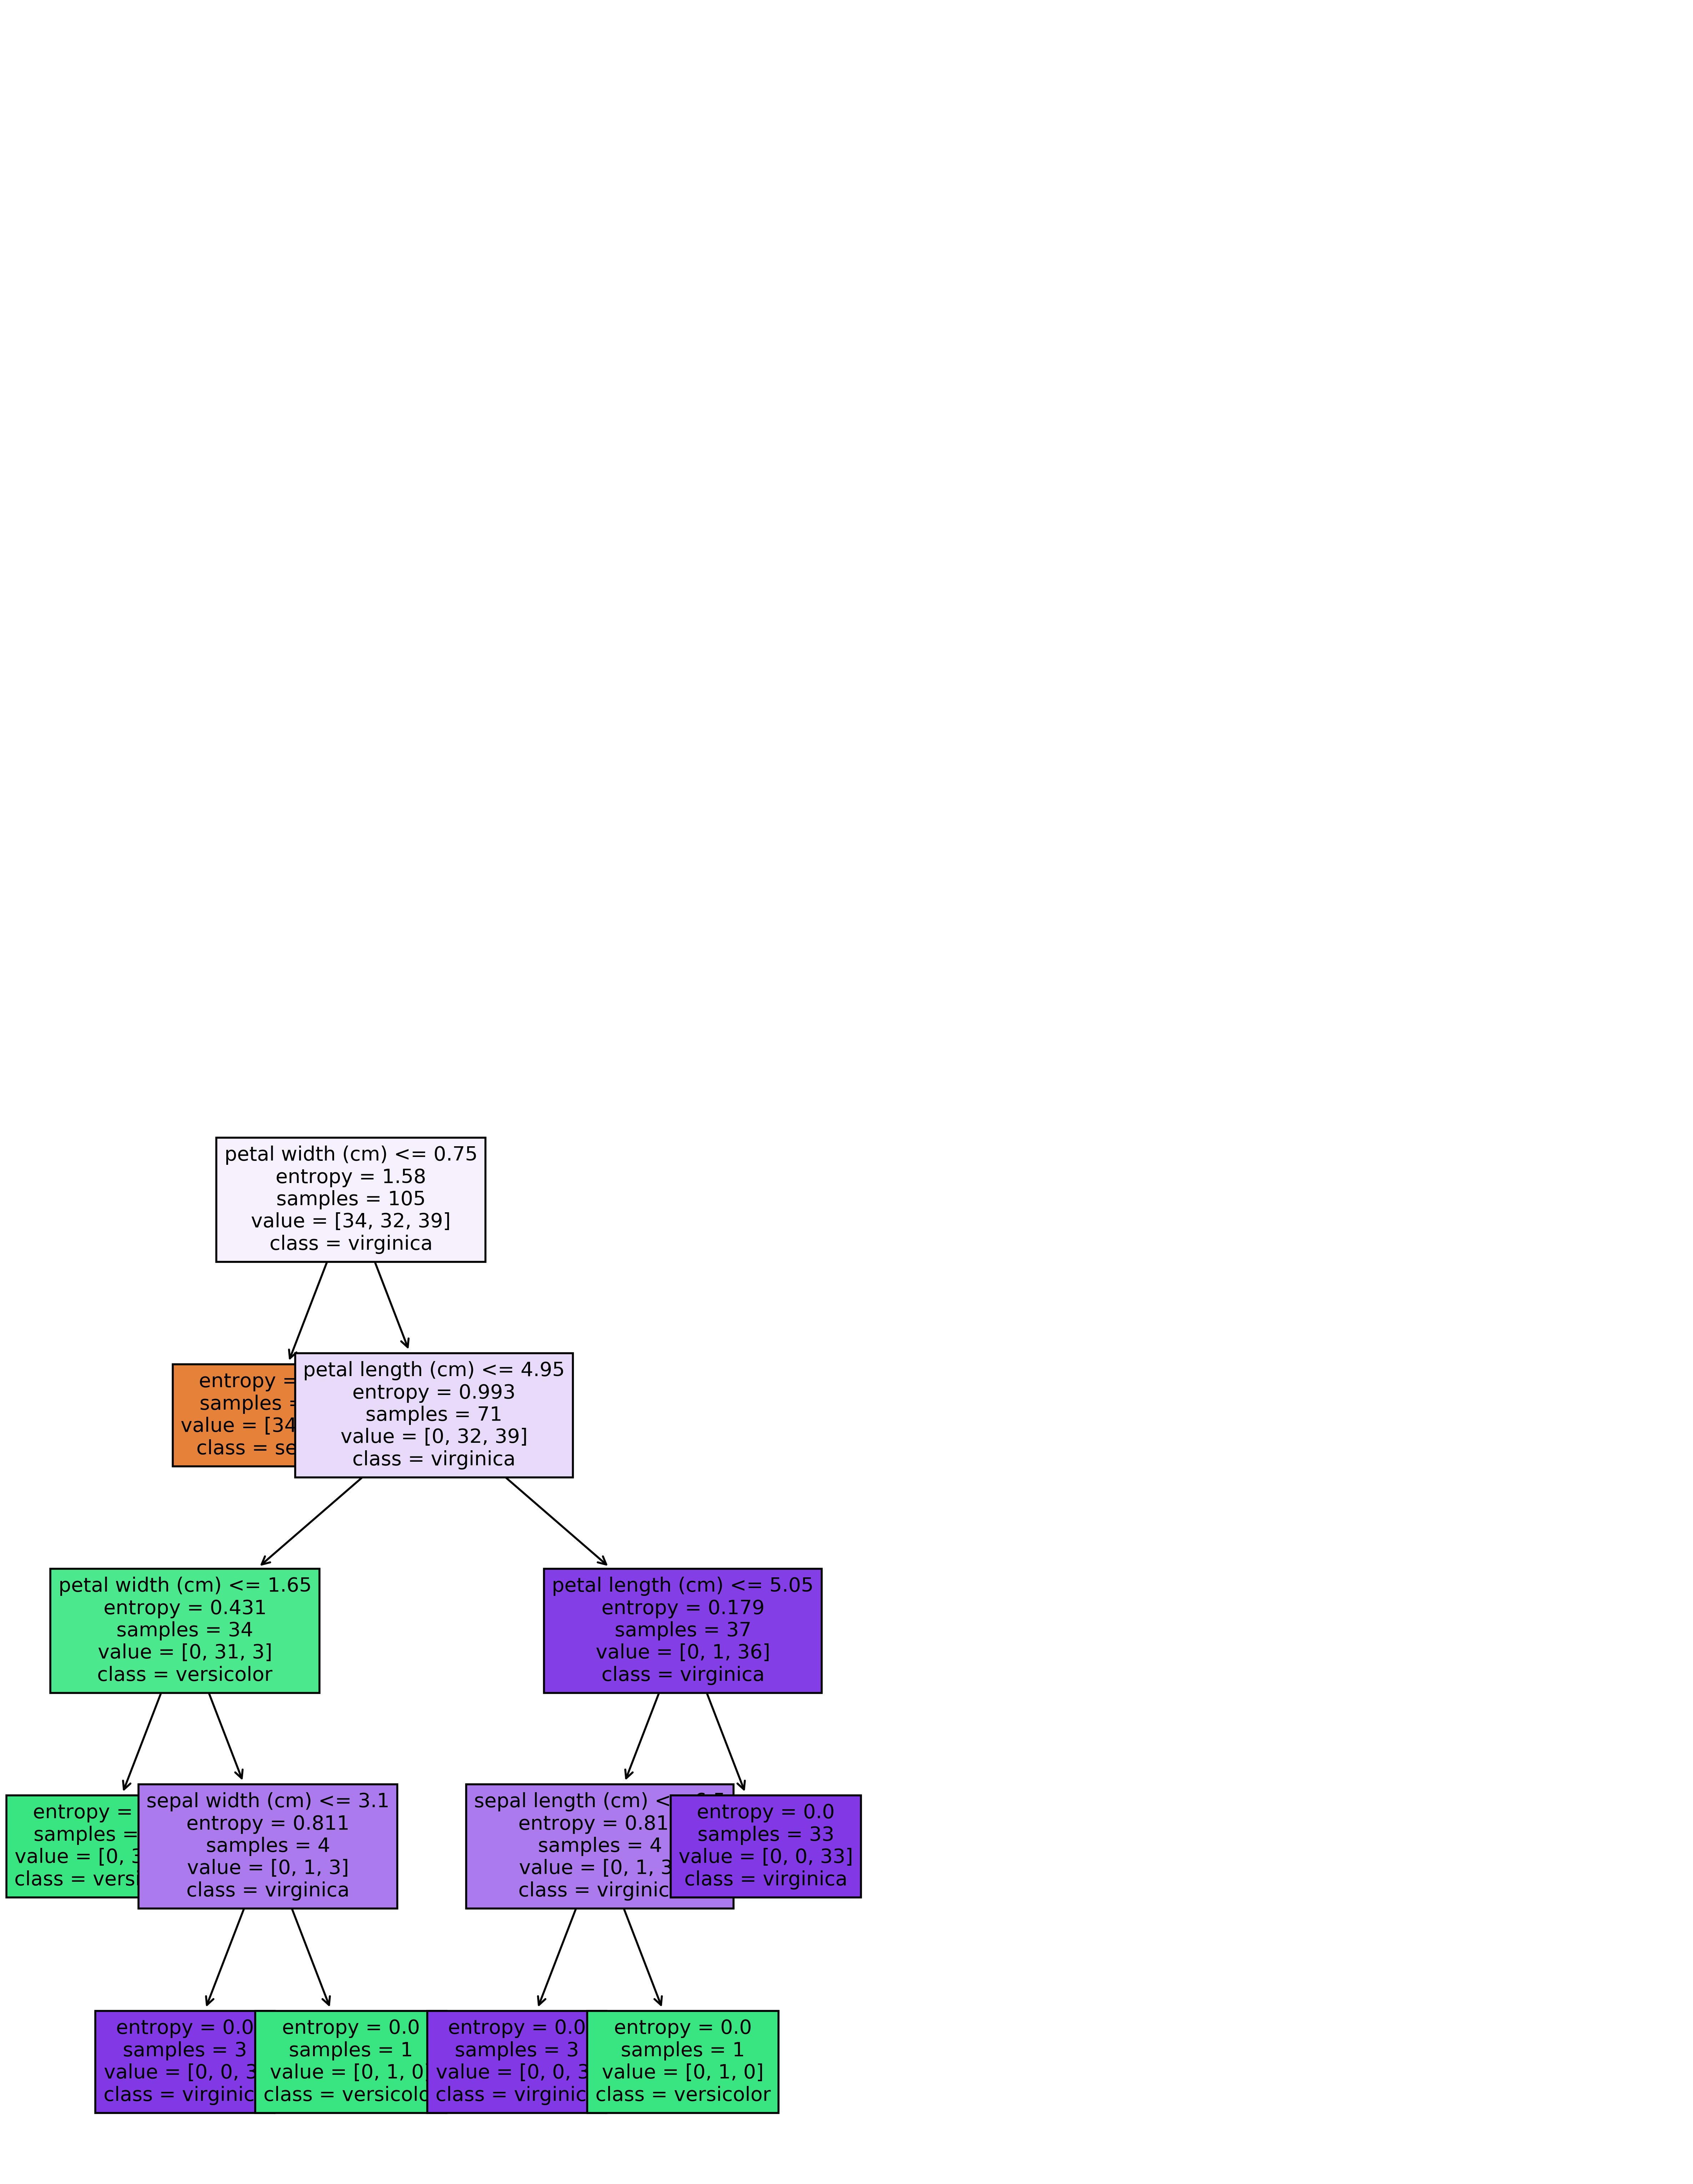

In [14]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,20), dpi=200)
plt.rcParams['text.color'] = 'black'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

tree.plot_tree(DT,feature_names = fn, filled=True, fontsize=10, label='all', impurity=True,max_depth=4,
               node_ids=False,proportion= False, rounded=False, class_names=cn,rotate=True,ax=axes)

## <span style="color:maroon"> <span style="font-family:Times New Roman"> Wrapped Up!!! </span>